In [1]:
import xarray as xr
import numpy as np
import holoviews as hv


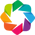

In [2]:
hv.notebook_extension('bokeh')

In [3]:
%matplotlib inline

In [4]:
#open MERRA2 Reanalysis dataset
merra2=xr.open_dataset('https://geodesystems.com/repository/opendap/038361f9-fb9a-484c-9f1d-3623a12a47ca/entry.das') #,chunks={'time':1}) 

In [6]:
def omega_selector(time):
    return hv.Image(merra2.omega.sel(time=time,lev=500))

dmap=hv.DynamicMap(omega_selector,kdims=['time']) 
dmap=dmap.redim.values(time=merra2.time.values)
tap_sel=hv.streams.Tap(x=0,y=0,source=dmap)

In [7]:
dmap

KeyboardInterrupt: 

In [41]:
%%opts Image (cmap='RdBu_r') [width=800 height=500 colorbar=True colorbar_position='bottom']
img=hv.Image(merra2.omega.isel(lev=20,time=0)*864)
img.redim.range(omega=(-50,50))

:Image   [lon,lat]   (omega)

In [42]:
hv.help(hv.Image)

Image

Online example: http://holoviews.org/reference/elements/bokeh/Image.html

-------------
Style Options
-------------

	cmap

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RasterPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

apply_extents                         True                       Boolean        (0, 1)     V RW  
apply_ranges                          True                       Boolean        (0, 1)     V RW  
bgcolor                               None                      Parameter                V RW AN 
border                                 10                         Number                   V RW  
clipping_colors           

In [37]:
merra2.omega.attrs

OrderedDict([('_CoordinateAxes', 'time lev lat lon '),
             ('units', 'pa s-1'),
             ('long_name', 'vertical pressure velocity pa s-1 ')])

In [103]:
dmap=hv.DynamicMap(CWV_time_sel,kdims=['time'])
dmap.redim.values(time=dates[::5])

:DynamicMap   [time]

In [13]:
import pandas as pd

In [16]:
dates=pd.date_range('2008-01-01','2008-02-01',freq='3H')

In [29]:
s=CWV_time_sel(dates[0])

In [8]:
def regrid(variable,nlon,nlat):
    
    lon_bins=nlon
    lat_bins=nlat
    lat_gpd=variable.groupby_bins('lat',lat_bins)
    latreg=lat_gpd.mean(dim=['lat'])#,skipna=True,keep_attrs=True)
    lon_gpd=latreg.groupby_bins('lon',lon_bins)
    regrided=lon_gpd.mean(dim=['lon']) #,skipna=True,keep_attrs=True)

    regrided=regrided.rename({'lat_bins':'lat'})
    regrided=regrided.rename({'lon_bins':'lon'})
    lats=[]
    for latbin in regrided.lat.values:
        latbounds=[float(lat) for lat in str(latbin).strip(r'(])').split(',')]
        lats.append(np.mean(latbounds))
    regrided['lat']=lats    

    lons=[]
    for lonbin in regrided.lon.values:
        lonbounds=[float(lon) for lon in str(lonbin).strip(r'(])').split(',')]
        lons.append(np.mean(lonbounds))
    regrided['lon']=lons

    return regrided#.sel(lat=slice(variable.lat.min(),variable.lat.max()),lon=slice(variable.lon.min(),variable.lon.max()))


In [9]:
%time
regrid(da.qv.isel(time=1),360,181)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


KeyboardInterrupt: 

In [19]:
from bokeh.models import HelpTool,HoverTool
from bokeh.models import Plot
from bokeh.plotting import show,figure

In [12]:
h=HelpTool()

In [11]:
p=Plot()

In [17]:
p.add_tools(HoverTool())

In [23]:
from bokeh.models import BoxSelectTool

plot = figure(tools="pan,wheel_zoom,box_zoom,reset")
#plot.add_tools(BoxSelectTool(dimensions=["width"]))

In [24]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider

In [26]:


# create some widgets
slider = Slider(start=0, end=10, value=1, step=.1, title="Slider")
button_group = RadioButtonGroup(labels=["Option 1", "Option 2", "Option 3"], active=0)
select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
button_1 = Button(label="Button 1")
button_2 = Button(label="Button 2")

# put the results in a row
show(widgetbox(button_1, slider, button_group, select, button_2, width=300))

In [27]:
from datetime import datetime,timedelta

In [33]:
S=DateRangeSlider(start=datetime(2008,1,1),end=datetime(2008,12,31),value=datetime(2008,2,1),step=dt)

ValueError: expected an element of Tuple(Date, Date), got datetime.datetime(2008, 2, 1, 0, 0)

In [30]:
dt=datetime(2008,1,2)-datetime(2008,1,1)

In [32]:
from bokeh.models.widgets import DateRangeSlider

In [34]:
p = figure(plot_width=400, plot_height=400, x_range=(0, 10), y_range=(0, 10))

In [37]:
p.image('/home/suvarchal/interactive_notebooks/nxm.png',0,1,10,10)

GlyphRenderer(id='805d9f03-412e-4fd4-be95-233407fe0dba', ...)

In [38]:
show(p)

ERROR:/home/suvarchal/miniconda3/lib/python3.6/site-packages/bokeh/core/validation/check.py:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: /home/suvarchal/interactive_notebooks/nxm.png [renderer: GlyphRenderer(id='805d9f03-412e-4fd4-be95-233407fe0dba', ...)]


In [39]:
p.image_rgba(image=[img], x=[0], y=[0], dw=[10], dh=[10])

NameError: name 'img' is not defined

In [3]:
from PIL import Image

In [4]:
img=Image.open('nxm.png')

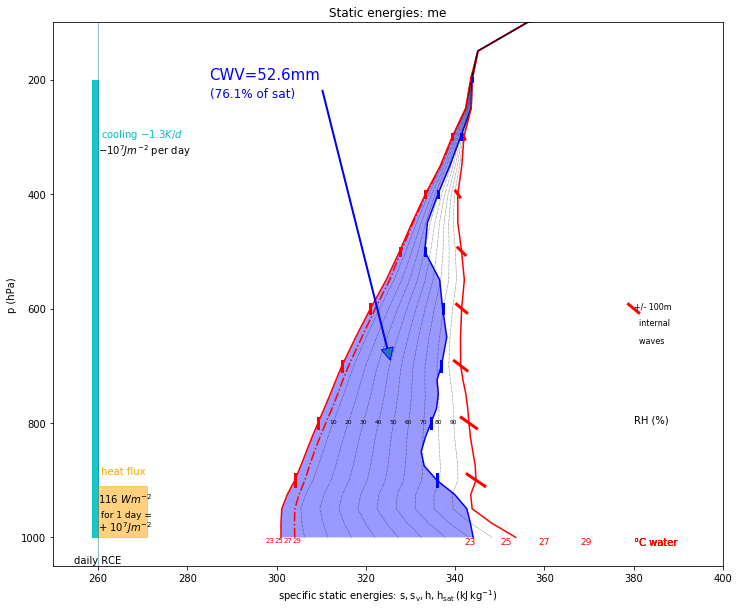

In [18]:
Image.open('nxm.png')

In [5]:
import numpy as np

In [7]:
np.shape(np.array(img))

(610, 739, 4)

In [8]:
from bokeh.plotting import figure, output_file, show, output_notebook


In [9]:
output_notebook()

Loading BokehJS ...

In [26]:

p = figure(plot_width=700, plot_height=500, x_range=(0, 10), y_range=(0, 10))

p.image_rgba(image=[np.array(img)], x=[0], y=[0], dw=[10], dh=[10],dilate=True)

show(p)